# TFM 


### Analisis exploratorio

In [67]:
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read

In [68]:
dF_stores=pd.read_csv('stores.csv')
dF_products=pd.read_csv('products.csv')
dF_customers=pd.read_csv('customers.csv')
dF_tickets=pd.read_csv('tickets.csv')

In [69]:
dF_stores.head()

,storeid,isocountrycode,city,startdate
0,ES4509,ES,Zaragoza,NaN
1,ES4507,ES,Zaragoza,2018-11-29
2,ES4506,ES,Zaragoza,NaN
3,ES4504,ES,Zaragoza,2015-12-17
4,ES4503,ES,Zaragoza,2015-12-17


In [70]:
dF_products.head()

,productid,merchandisegroup,merchandisesubgroup,isocountrycode,article,internationalarticlenumber,sectionname,familyname,categoryname,subcategoryname,merchandisefamily,weightproduct,scaleproduct,vatdescription,vatrate,agelimit,hwgdescription
0,1039,Surtido seco,Golosinas,ES,Orbit chicles sabores mentolados,NaN,ALIMENTACION SECA,"CHICLES, CARAMELO, GOLOSI",CHICLES,CHICLES,Otros productos dulces,False,True,Reducido,10.0,Keines,Pan/Bollería/Golosinas/OTC
1,3408,Surtido seco,Cosmetic,ES,Signal dentífrico,NaN,PERFUMERIA E HIGIENE,HIGIENE BUCAL,DENTIFRICOS,DENTIFRICOS,"Higiene bucal, afeitado",False,True,Ordinario,21.0,Keines,Surtido NF
2,8060,Surtido seco,Art. Limpieza,ES,Krafft Lavaparabrisas,NaN,ARTICULOS RESTO,ARTICULOS RESTO,ARTICULOS RESTO,ARTICULOS RESTO,Productos de limpieza y lavavajillas,False,False,Ordinario,21.0,Keines,Surtido NF
3,8602,Surtido seco,Cervezas / Derivados,ES,Benediktiner Cerveza de trigo sin a,NaN,NaN,NaN,NaN,NaN,"Cerveza, combinados de cerveza",False,False,Ordinario,21.0,18,Bebidas
4,5701449,Frischbrot / Hot Convenience,Bake off,ES,Mona de Pascua con frutas,5701449.0,PASTELERIA/BOLLERIA GRANEL,PASTELERIA/BOLLERIA GRANEL,PASTELERIA/BOLLERIA GRANEL,PASTELERIA/BOLLERIA GRANEL,Otros,False,False,Reducido,10.0,Keines,Pan/Bollería/Golosinas/OTC


In [71]:
dF_customers.head()

,customerid,isocountrycode,regularstoreid,registrationdate,unregistrationdate,gender,age,zipcode
0,77340000025949734,ES,ES0263,2017-11-26,NaN,M,56.0,50018
1,77340000025945951,ES,ES4503,2017-11-25,NaN,F,41.0,50021
2,77340000025945660,ES,ES0428,2017-11-25,NaN,M,87.0,50009
3,77340000025943914,ES,ES4504,2017-11-25,NaN,M,73.0,50009
4,77340000025943041,ES,ES0428,2017-11-25,NaN,F,44.0,50004


In [72]:
dF_tickets.head()

,ticketid,linenumber,customerid,cardtype,datekey,productid,quantity,extendedamount,originalamount,totaldiscount,itemdescription,storeid,storecity
0,10004503220190201744194,19,77340000013311992,DigitalCard,2019-02-01,853,1.0,1.29,1.29,0.0,AtÃºn claro natural,ES4503,Zaragoza
1,10004503520190201774912,13,77340000013409574,DigitalCard,2019-02-01,5704109,1.0,1.09,1.09,0.0,Agua mineral natur,ES4503,Zaragoza
2,1000450732019020114037,14,77340000011772214,DigitalCard,2019-02-01,201,1.0,0.99,0.99,0.0,CafÃ© nat molido,ES4507,Zaragoza
3,1000450762019020140789,43,77340000000542815,Mobile,2019-02-01,262,1.0,0.75,0.75,0.0,Chocolate fondant,ES4507,Zaragoza
4,10004504320190201330084,20,77340000013090638,Mobile,2019-02-01,37082,1.0,1.05,1.05,0.0,Yogur natural,ES4504,Zaragoza


## Merge dataframes

In [73]:
ticket_store = dF_tickets.merge(dF_stores, on="storeid", how = 'inner')
ticket_store.head()

,ticketid,linenumber,customerid,cardtype,datekey,productid,quantity,extendedamount,originalamount,totaldiscount,itemdescription,storeid,storecity,isocountrycode,city,startdate
0,10004503220190201744194,19,77340000013311992,DigitalCard,2019-02-01,853,1.0,1.29,1.29,0.00,AtÃºn claro natural,ES4503,Zaragoza,ES,Zaragoza,2015-12-17
1,10004503520190201774912,13,77340000013409574,DigitalCard,2019-02-01,5704109,1.0,1.09,1.09,0.00,Agua mineral natur,ES4503,Zaragoza,ES,Zaragoza,2015-12-17
2,10004503620190201356730,7,77340000012025772,DigitalCard,2019-02-01,88260,1.0,2.48,2.49,0.01,Queso Havarti,ES4503,Zaragoza,ES,Zaragoza,2015-12-17
3,10004503420190201731752,4,77340000010642455,Mobile,2019-02-01,51966,1.0,0.79,0.79,0.00,Copos de avena,ES4503,Zaragoza,ES,Zaragoza,2015-12-17
4,10004503620190201356856,40,77340000012927193,DigitalCard,2019-02-01,1631,1.0,0.79,0.79,0.00,Levadura en polvo,ES4503,Zaragoza,ES,Zaragoza,2015-12-17


In [74]:
ticket_store_cust = ticket_store.merge(dF_customers, on="customerid", how = 'inner')
ticket_store_cust.head()

,ticketid,linenumber,customerid,cardtype,datekey,productid,quantity,extendedamount,originalamount,totaldiscount,...,isocountrycode_x,city,startdate,isocountrycode_y,regularstoreid,registrationdate,unregistrationdate,gender,age,zipcode
0,10004503220190201744194,19,77340000013311992,DigitalCard,2019-02-01,853,1.000,1.29,1.29,0.00,...,ES,Zaragoza,2015-12-17,ES,ES4503,2017-06-24,NaN,F,44.0,50740
1,10004503220190201744194,8,77340000013311992,DigitalCard,2019-02-01,8934,1.694,2.87,3.71,0.84,...,ES,Zaragoza,2015-12-17,ES,ES4503,2017-06-24,NaN,F,44.0,50740
2,10004503220190201744194,43,77340000013311992,DigitalCard,2019-02-01,80229,1.000,1.39,1.39,0.00,...,ES,Zaragoza,2015-12-17,ES,ES4503,2017-06-24,NaN,F,44.0,50740
3,10004503220190201744194,52,77340000013311992,DigitalCard,2019-02-01,132367,1.000,1.29,1.29,0.00,...,ES,Zaragoza,2015-12-17,ES,ES4503,2017-06-24,NaN,F,44.0,50740
4,10004503220190201744194,44,77340000013311992,DigitalCard,2019-02-01,2967,1.000,0.52,0.59,0.07,...,ES,Zaragoza,2015-12-17,ES,ES4503,2017-06-24,NaN,F,44.0,50740


In [75]:
dF_Final = ticket_store_cust.merge(dF_products, on="productid", how = 'inner')

dF_Final.head()

,ticketid,linenumber,customerid,cardtype,datekey,productid,quantity,extendedamount,originalamount,totaldiscount,...,familyname,categoryname,subcategoryname,merchandisefamily,weightproduct,scaleproduct,vatdescription,vatrate,agelimit,hwgdescription
0,10004503220190201744194,8,77340000013311992,DigitalCard,2019-02-01,8934,1.694,2.87,3.71,0.84,...,CARNE FRESCA,AVE,POLLO,Pollo,True,False,Reducido,10.0,Keines,Pollo/Carne/Pescado
1,10004503220190201744194,7,77340000013311992,DigitalCard,2019-02-01,8934,1.616,2.73,3.54,0.81,...,CARNE FRESCA,AVE,POLLO,Pollo,True,False,Reducido,10.0,Keines,Pollo/Carne/Pescado
2,10004503420190201731752,9,77340000010642455,Mobile,2019-02-01,8934,1.626,2.75,3.56,0.81,...,CARNE FRESCA,AVE,POLLO,Pollo,True,False,Reducido,10.0,Keines,Pollo/Carne/Pescado
3,10004503620190201356856,7,77340000012927193,DigitalCard,2019-02-01,8934,1.333,2.25,2.92,0.67,...,CARNE FRESCA,AVE,POLLO,Pollo,True,False,Reducido,10.0,Keines,Pollo/Carne/Pescado
4,10004503620190201356856,8,77340000012927193,DigitalCard,2019-02-01,8934,1.297,2.20,2.84,0.64,...,CARNE FRESCA,AVE,POLLO,Pollo,True,False,Reducido,10.0,Keines,Pollo/Carne/Pescado


In [76]:
dF_Final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305864 entries, 0 to 305863
Data columns (total 39 columns):
ticketid                      305864 non-null object
linenumber                    305864 non-null int64
customerid                    305864 non-null int64
cardtype                      305864 non-null object
datekey                       305864 non-null object
productid                     305864 non-null int64
quantity                      305864 non-null float64
extendedamount                305864 non-null float64
originalamount                305864 non-null float64
totaldiscount                 305864 non-null float64
itemdescription               305864 non-null object
storeid                       305864 non-null object
storecity                     305864 non-null object
isocountrycode_x              305864 non-null object
city                          305864 non-null object
startdate                     305864 non-null object
isocountrycode_y              305864 non

In [77]:
dF_Final["hwgdescription"].value_counts()

Pan/Bollería/Golosinas/OTC    99459
F&V/Plantas y Flores          98601
Pollo/Carne/Pescado           49474
Alimentación                  19587
Bebidas                       14532
Fresco                        10330
Surtido NF                     7508
Conservas                      3388
Congelados                     2985
Name: hwgdescription, dtype: int64

In [78]:
dF_Final["cardtype"].value_counts()

DigitalCard    250019
Mobile          51533
PaymentCard      3792
Wallet            520
Name: cardtype, dtype: int64

In [79]:
dF_Final.groupby("hwgdescription")["age"].mean()

hwgdescription
Alimentación                  46.617501
Bebidas                       46.311390
Congelados                    47.224480
Conservas                     44.683808
F&V/Plantas y Flores          47.496835
Fresco                        46.664226
Pan/Bollería/Golosinas/OTC    46.762604
Pollo/Carne/Pescado           47.154043
Surtido NF                    46.554313
Name: age, dtype: float64

In [80]:
Y = pd.DataFrame(dF_Final["extendedamount"], columns=["extendedamount"])
Y.head(5)

,extendedamount
0,2.87
1,2.73
2,2.75
3,2.25
4,2.20


In [81]:
sns.heatmap(dF_Final.join(Y).corr(),annot=True)

ValueError: columns overlap but no suffix specified: Index(['extendedamount'], dtype='object')

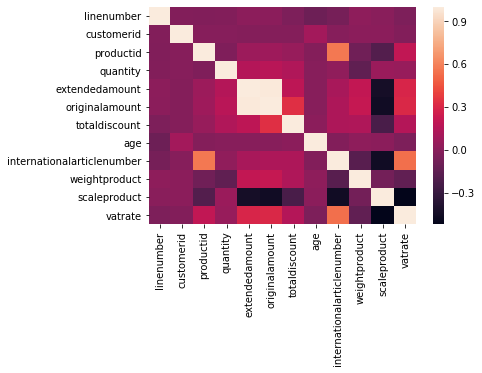

In [82]:
sns.heatmap(dF_Final.corr())

In [83]:
dF_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305864 entries, 0 to 305863
Data columns (total 39 columns):
ticketid                      305864 non-null object
linenumber                    305864 non-null int64
customerid                    305864 non-null int64
cardtype                      305864 non-null object
datekey                       305864 non-null object
productid                     305864 non-null int64
quantity                      305864 non-null float64
extendedamount                305864 non-null float64
originalamount                305864 non-null float64
totaldiscount                 305864 non-null float64
itemdescription               305864 non-null object
storeid                       305864 non-null object
storecity                     305864 non-null object
isocountrycode_x              305864 non-null object
city                          305864 non-null object
startdate                     305864 non-null object
isocountrycode_y              305864 non

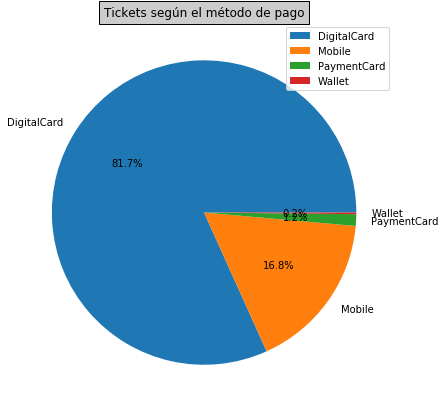

In [84]:
df_tickets_pay_method = dF_Final["cardtype"].value_counts()
df_tickets_pay_method = df_tickets_pay_method / df_tickets_pay_method.sum()
plt.figure(figsize = (7, 7))
plt.pie(df_tickets_pay_method, labels = df_tickets_pay_method.index, autopct='%1.1f%%')
plt.title('Tickets según el método de pago', bbox={"facecolor":"0.8", "pad":5})
plt.legend()

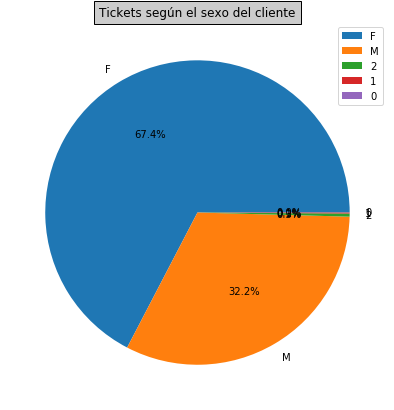

In [85]:
df_tickets_gender = dF_Final["gender"].value_counts()
df_tickets_gender = df_tickets_gender / df_tickets_gender.sum()
plt.figure(figsize = (7, 7))
plt.pie(df_tickets_gender, labels = df_tickets_gender.index, autopct='%1.1f%%')
plt.title('Tickets según el sexo del cliente', bbox={"facecolor":"0.8", "pad":5})
plt.legend()

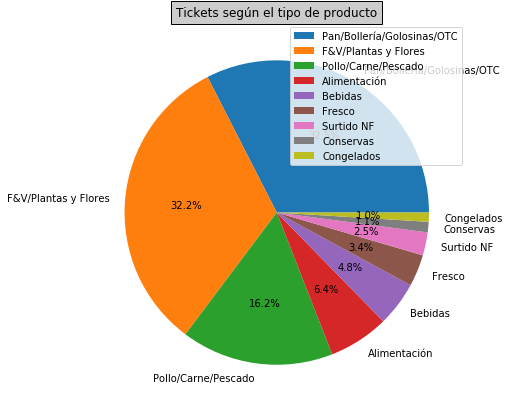

In [86]:
df_tickets_description = dF_Final["hwgdescription"].value_counts()
df_tickets_description = df_tickets_description / df_tickets_description.sum()
plt.figure(figsize = (7, 7))
plt.pie(df_tickets_description, labels = df_tickets_description.index, autopct='%1.1f%%')
plt.title('Tickets según el tipo de producto', bbox={"facecolor":"0.8", "pad":5})
plt.legend()